In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/25_26_dbit/odd_ML_CSL/ML/Experiments/ml_2025_colab_experiments/weatherAUS.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# Check if there are null values

In [ ]:
# finding null values
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [ ]:
# Show only columns with missing values
missing_cols = df.isnull().sum()
missing_cols = missing_cols[missing_cols > 0]
print(missing_cols)


MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


## To decide between mean and median for filling missing values in numerical columns like MinTemp, MaxTemp, Rainfall, and Evaporation, consider the distribution of the data: normal - mean, skewed- median

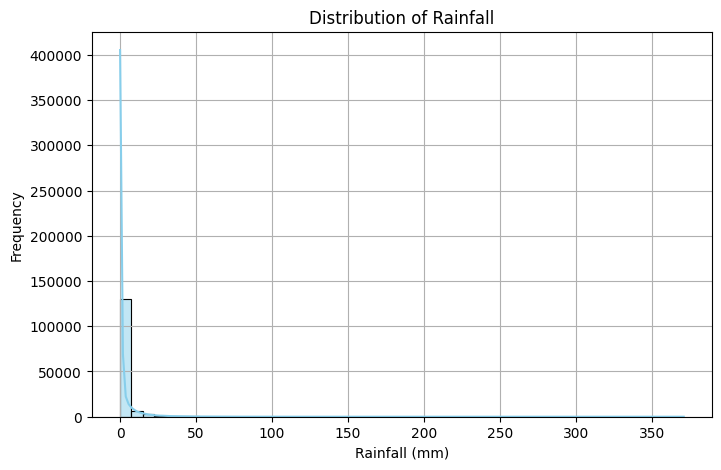

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram + KDE (density curve)
plt.figure(figsize=(8, 5))
sns.histplot(df['Rainfall'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
# Use median for skewed data
df['Rainfall'].fillna(df['Rainfall'].median(), inplace=True)

/tmp/ipython-input-77-3486320971.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rainfall'].fillna(df['Rainfall'].median(), inplace=True)


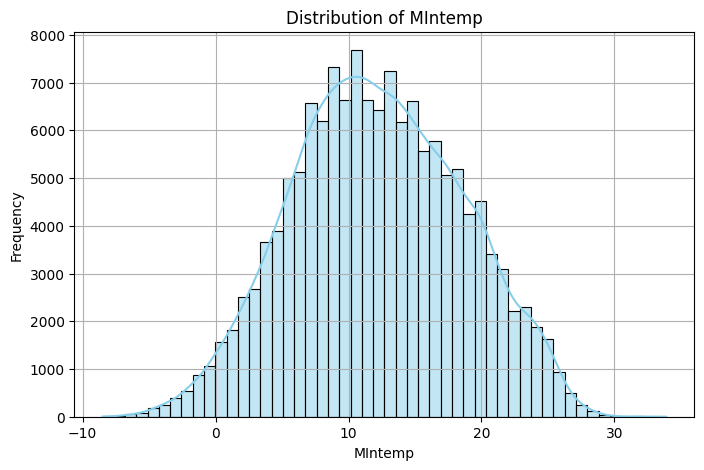

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram + KDE (density curve)
plt.figure(figsize=(8, 5))
sns.histplot(df['MinTemp'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of MIntemp')
plt.xlabel('MIntemp')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
df['MinTemp'].fillna(df['MinTemp'].mean(), inplace=True)

/tmp/ipython-input-79-1056995281.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MinTemp'].fillna(df['MinTemp'].mean(), inplace=True)


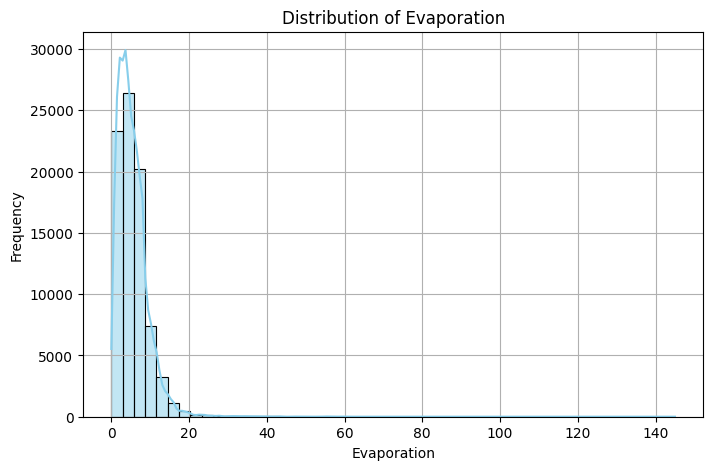

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram + KDE (density curve)
plt.figure(figsize=(8, 5))
sns.histplot(df['Evaporation'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Evaporation')
plt.xlabel('Evaporation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
df['Evaporation'].fillna(df['Evaporation'].median(), inplace=True)

/tmp/ipython-input-81-3837743861.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Evaporation'].fillna(df['Evaporation'].median(), inplace=True)


In [ ]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,1261
Rainfall,0
Evaporation,0
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


# Do the same for all numeric fields like- pressure9am, pressure 3pm etc. whereever there are missing numeric values

I have used mean to replace all null values in all columns. You must check distribution and accordingly use mean or media

In [ ]:
df['Pressure9am'].fillna(df['Pressure9am'].median(), inplace=True)

/tmp/ipython-input-83-4078634906.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Pressure9am'].fillna(df['Pressure9am'].median(), inplace=True)


In [ ]:
df['Pressure3pm'].fillna(df['Pressure3pm'].median(), inplace=True)

/tmp/ipython-input-84-4127546328.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Pressure3pm'].fillna(df['Pressure3pm'].median(), inplace=True)


In [ ]:
df['Humidity3pm'].fillna(df['Humidity3pm'].median(), inplace=True)

/tmp/ipython-input-85-1321714639.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Humidity3pm'].fillna(df['Humidity3pm'].median(), inplace=True)


In [ ]:
df['Humidity9am'].fillna(df['Humidity9am'].median(), inplace=True)

/tmp/ipython-input-86-2610870833.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Humidity9am'].fillna(df['Humidity9am'].median(), inplace=True)


In [ ]:
df['MaxTemp'].fillna(df['MaxTemp'].median(), inplace=True)

/tmp/ipython-input-87-909294264.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MaxTemp'].fillna(df['MaxTemp'].median(), inplace=True)


In [ ]:
df['Cloud9am'].fillna(df['Cloud9am'].median(), inplace=True)

/tmp/ipython-input-88-2463892102.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cloud9am'].fillna(df['Cloud9am'].median(), inplace=True)


In [ ]:
df['Cloud3pm'].fillna(df['Cloud3pm'].median(), inplace=True)

/tmp/ipython-input-89-3607970376.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cloud3pm'].fillna(df['Cloud3pm'].median(), inplace=True)


In [ ]:
df['Temp3pm'].fillna(df['Temp3pm'].median(), inplace=True)

/tmp/ipython-input-90-2329189310.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Temp3pm'].fillna(df['Temp3pm'].median(), inplace=True)


In [ ]:
df['Temp9am'].fillna(df['Temp9am'].median(), inplace=True)

/tmp/ipython-input-91-3722035866.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Temp9am'].fillna(df['Temp9am'].median(), inplace=True)


In [ ]:
df['Rainfall'].isnull().sum()     # checking if rainfall has any null values

np.int64(0)

In [ ]:
df['WindGustSpeed'].isnull().sum()

np.int64(10263)

In [ ]:
df['WindGustSpeed'].fillna(df['WindGustSpeed'].median(), inplace=True)

/tmp/ipython-input-94-3526465122.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WindGustSpeed'].fillna(df['WindGustSpeed'].median(), inplace=True)


In [ ]:
df['WindSpeed9am'].fillna(df['WindSpeed9am'].median(), inplace=True)

/tmp/ipython-input-95-3070546960.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WindSpeed9am'].fillna(df['WindSpeed9am'].median(), inplace=True)


In [ ]:
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median(), inplace=True)

/tmp/ipython-input-96-2283846530.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median(), inplace=True)


In [ ]:
# let's drop Sunshine attribute
df.drop('Sunshine', axis=1, inplace=True)

In [ ]:
# Show only columns with missing values
missing_cols = df.isnull().sum()
missing_cols = missing_cols[missing_cols > 0]
print(missing_cols)

WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


## **RainToday** is a non-numeric variable. We see it has 'Yes', No and nan (null) values. We find maximum occurence of unique value like Yes and No. Whichever gives higher number, we use that to fill null values.

In [ ]:
df.RainToday.unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
# Step 1: Find the most frequent value (mode)
most_frequent = df['RainToday'].mode()[0]

In [ ]:
# Step 2: Fill NaNs with that value
df['RainToday'].fillna(most_frequent, inplace=True)

/tmp/ipython-input-101-457509015.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RainToday'].fillna(most_frequent, inplace=True)


In [ ]:
print("Filled missing values with:", most_frequent)

Filled missing values with: No


In [ ]:
df.RainToday.unique()

array(['No', 'Yes'], dtype=object)

## We will use same approach for WindGustDir, WindDir9am, WindDir3pm

In [ ]:
most_frequent = df['WindGustDir'].mode()[0]
df['WindGustDir'].fillna(most_frequent, inplace=True)

/tmp/ipython-input-104-1905910770.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WindGustDir'].fillna(most_frequent, inplace=True)


In [ ]:
most_frequent = df['WindDir9am'].mode()[0]
df['WindDir9am'].fillna(most_frequent, inplace=True)

/tmp/ipython-input-105-3218752069.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WindDir9am'].fillna(most_frequent, inplace=True)


In [ ]:
most_frequent = df['WindDir3pm'].mode()[0]
df['WindDir3pm'].fillna(most_frequent, inplace=True)

/tmp/ipython-input-106-4270499138.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WindDir3pm'].fillna(most_frequent, inplace=True)


In [ ]:
# Show only columns with missing values
missing_cols = df.isnull().sum()
missing_cols = missing_cols[missing_cols > 0]
print(missing_cols)

RainTomorrow    3267
dtype: int64


We can see none of the columns have null values. Only target variable RainTomorrow has null values. We keep that as it is.

## **Covert Textual (object) datatypes to Numeric data types (like int, float)--- Perform ONe hot encoding for 'LOCATION' variable**

In [ ]:
df.dtypes

,0
Date,object
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object
WindDir3pm,object


In [ ]:
# check labels in location variable

df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [ ]:
df.Location.value_counts()

,count
Location,
Canberra,3436
Sydney,3344
Adelaide,3193
Darwin,3193
Hobart,3193
Perth,3193
Melbourne,3193
Brisbane,3193
Albury,3040


In [ ]:
# Just create dummy columns for 'Location' only
dum_loc = pd.get_dummies(df['Location'])


In [ ]:
# Convert to 0 and 1
dum_loc = dum_loc.astype(int)

In [ ]:
# Join with original dataframe
df = pd.concat([df, dum_loc], axis=1)

In [ ]:
# drop original location column
df.drop('Location', axis=1, inplace=True)

In [ ]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,2008-12-01,13.4,22.9,0.6,4.8,W,44.0,W,WNW,20.0,...,0,0,0,0,0,0,0,0,0,0
1,2008-12-02,7.4,25.1,0.0,4.8,WNW,44.0,NNW,WSW,4.0,...,0,0,0,0,0,0,0,0,0,0
2,2008-12-03,12.9,25.7,0.0,4.8,WSW,46.0,W,WSW,19.0,...,0,0,0,0,0,0,0,0,0,0
3,2008-12-04,9.2,28.0,0.0,4.8,NE,24.0,SE,E,11.0,...,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,17.5,32.3,1.0,4.8,W,41.0,ENE,NW,7.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow', 'Adelaide', 'Albany', 'Albury',
       'AliceSprings', 'BadgerysCreek', 'Ballarat', 'Bendigo', 'Brisbane',
       'Cairns', 'Canberra', 'Cobar', 'CoffsHarbour', 'Dartmoor', 'Darwin',
       'GoldCoast', 'Hobart', 'Katherine', 'Launceston', 'Melbourne',
       'MelbourneAirport', 'Mildura', 'Moree', 'MountGambier', 'MountGinini',
       'Newcastle', 'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa',
       'PearceRAAF', 'Penrith', 'Perth', 'PerthAirport', 'Portland',
       'Richmond', 'Sale', 'SalmonGums', 'Sydney', 'SydneyAirport',
       'Townsville', 'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole',
       'Watsonia', 'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'

## LAbel Encoding for RAinToday variable

In [ ]:
# rain today
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Fit and transform the 'Rain' column
df['RainToday'] = le.fit_transform(df['RainToday'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 70 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              145460 non-null  object 
 1   MinTemp           145460 non-null  float64
 2   MaxTemp           145460 non-null  float64
 3   Rainfall          145460 non-null  float64
 4   Evaporation       145460 non-null  float64
 5   WindGustDir       145460 non-null  object 
 6   WindGustSpeed     145460 non-null  float64
 7   WindDir9am        145460 non-null  object 
 8   WindDir3pm        145460 non-null  object 
 9   WindSpeed9am      145460 non-null  float64
 10  WindSpeed3pm      145460 non-null  float64
 11  Humidity9am       145460 non-null  float64
 12  Humidity3pm       145460 non-null  float64
 13  Pressure9am       145460 non-null  float64
 14  Pressure3pm       145460 non-null  float64
 15  Cloud9am          145460 non-null  float64
 16  Cloud3pm          14

Drop date column (find syntax for that and implement)

## do one hot encoding for WindDir9am, WindDir3pm on your own

## **Apply logistic regression for machine learning**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, test_size = 0.2, random_state=42)

In [ ]:
print("test_df",test_df.shape)
print("train_df",train_df.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression(solver='liblinear')

In [ ]:
model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
